In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy import stats
import matplotlib.pyplot as plt

# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

In [66]:
# Your code here
df = pd.read_csv('../data/boston_data.csv')

In [67]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [68]:
df.info() # no NaNs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
crim       404 non-null float64
zn         404 non-null float64
indus      404 non-null float64
chas       404 non-null float64
nox        404 non-null float64
rm         404 non-null float64
age        404 non-null float64
dis        404 non-null float64
rad        404 non-null float64
tax        404 non-null float64
ptratio    404 non-null float64
black      404 non-null float64
lstat      404 non-null float64
medv       404 non-null float64
dtypes: float64(14)
memory usage: 44.3 KB


In [69]:
# remove outliers

In [70]:
chas_df = df[['chas']] # creating a chas df to later merge them with the clean dataframe

In [71]:
df_no_chas = df.drop(['chas'], axis =1) # droping chass to remove outliers as chass is categorical

In [72]:
df_no_chas.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [73]:
df_no_chas = df_no_chas[(np.abs(stats.zscore(df_no_chas))<3).all(axis=1)] # removing outliers by z score above 3.
df_no_chas.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [74]:
df_no_chas.shape

(344, 13)

In [75]:
df_clean = df_no_chas.merge(chas_df, how='left', left_index = True, right_index=True) #merging chass with data 

In [76]:
df_clean.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,chas
0,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7,0.0
1,0.10328,25.0,5.13,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6,0.0
2,0.34940,0.0,9.90,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3,0.0
3,2.73397,0.0,19.58,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4,0.0
4,0.04337,21.0,5.64,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5,0.0


### Checking correlations and colinearity to remove them

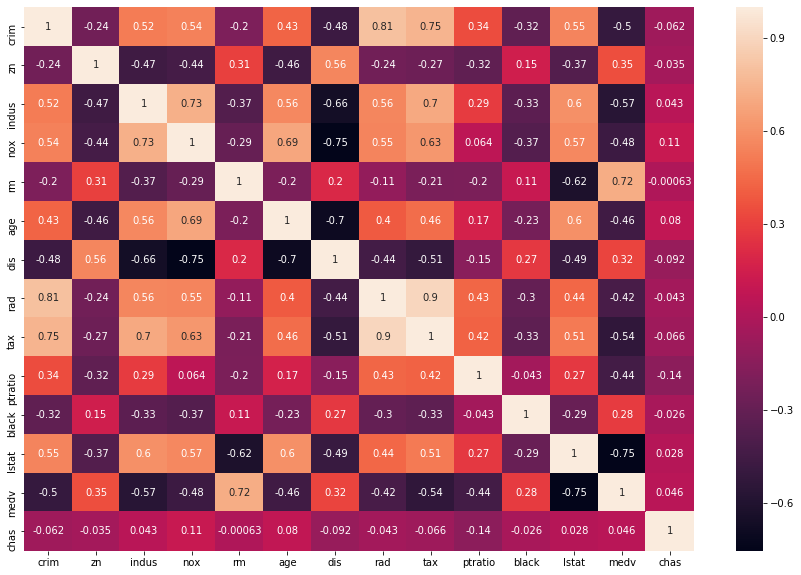

In [83]:
fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(df_clean.corr(), annot=True, ax=ax)

In [77]:
#Checking for colinearity

from statsmodels.stats import outliers_influence
from statsmodels.tools.tools import add_constant

X = add_constant(df_clean)

mc_check = pd.Series([outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
             index=X.columns)

print(mc_check)

const      781.992243
crim         3.652807
zn           1.808369
indus        3.472857
nox          4.197093
rm           2.926754
age          2.927891
dis          3.661076
rad          8.550213
tax          8.796591
ptratio      1.880130
black        1.236763
lstat        3.559506
medv         4.840440
chas         1.066729
dtype: float64


In [84]:
df_clean.drop(['rad'], axis=1, inplace=True)

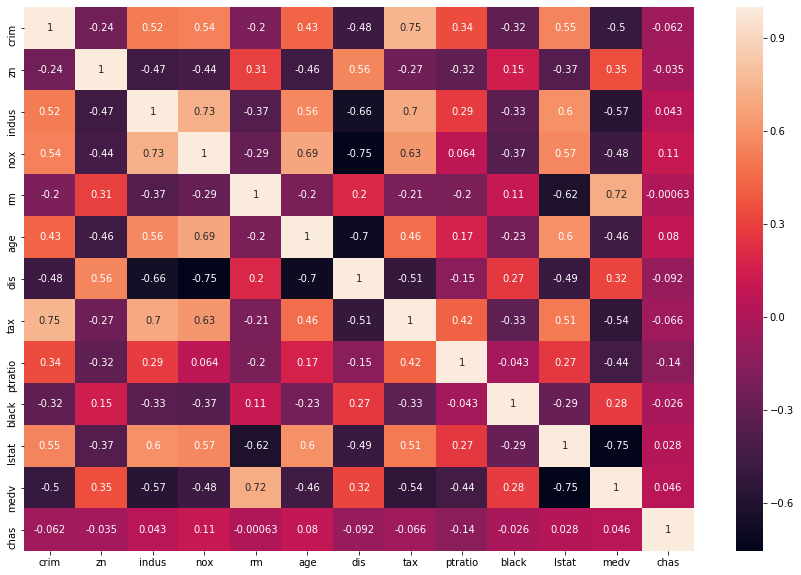

In [85]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_clean.corr(), annot=True, ax=ax)

In [86]:
X = add_constant(df_clean)
mc_check = pd.Series([outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
             index=X.columns)
print(mc_check)

const      709.526852
crim         2.766775
zn           1.787083
indus        3.358514
nox          4.110645
rm           2.925783
age          2.927276
dis          3.590256
tax          3.946747
ptratio      1.786777
black        1.236501
lstat        3.556383
medv         4.609621
chas         1.056321
dtype: float64


/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


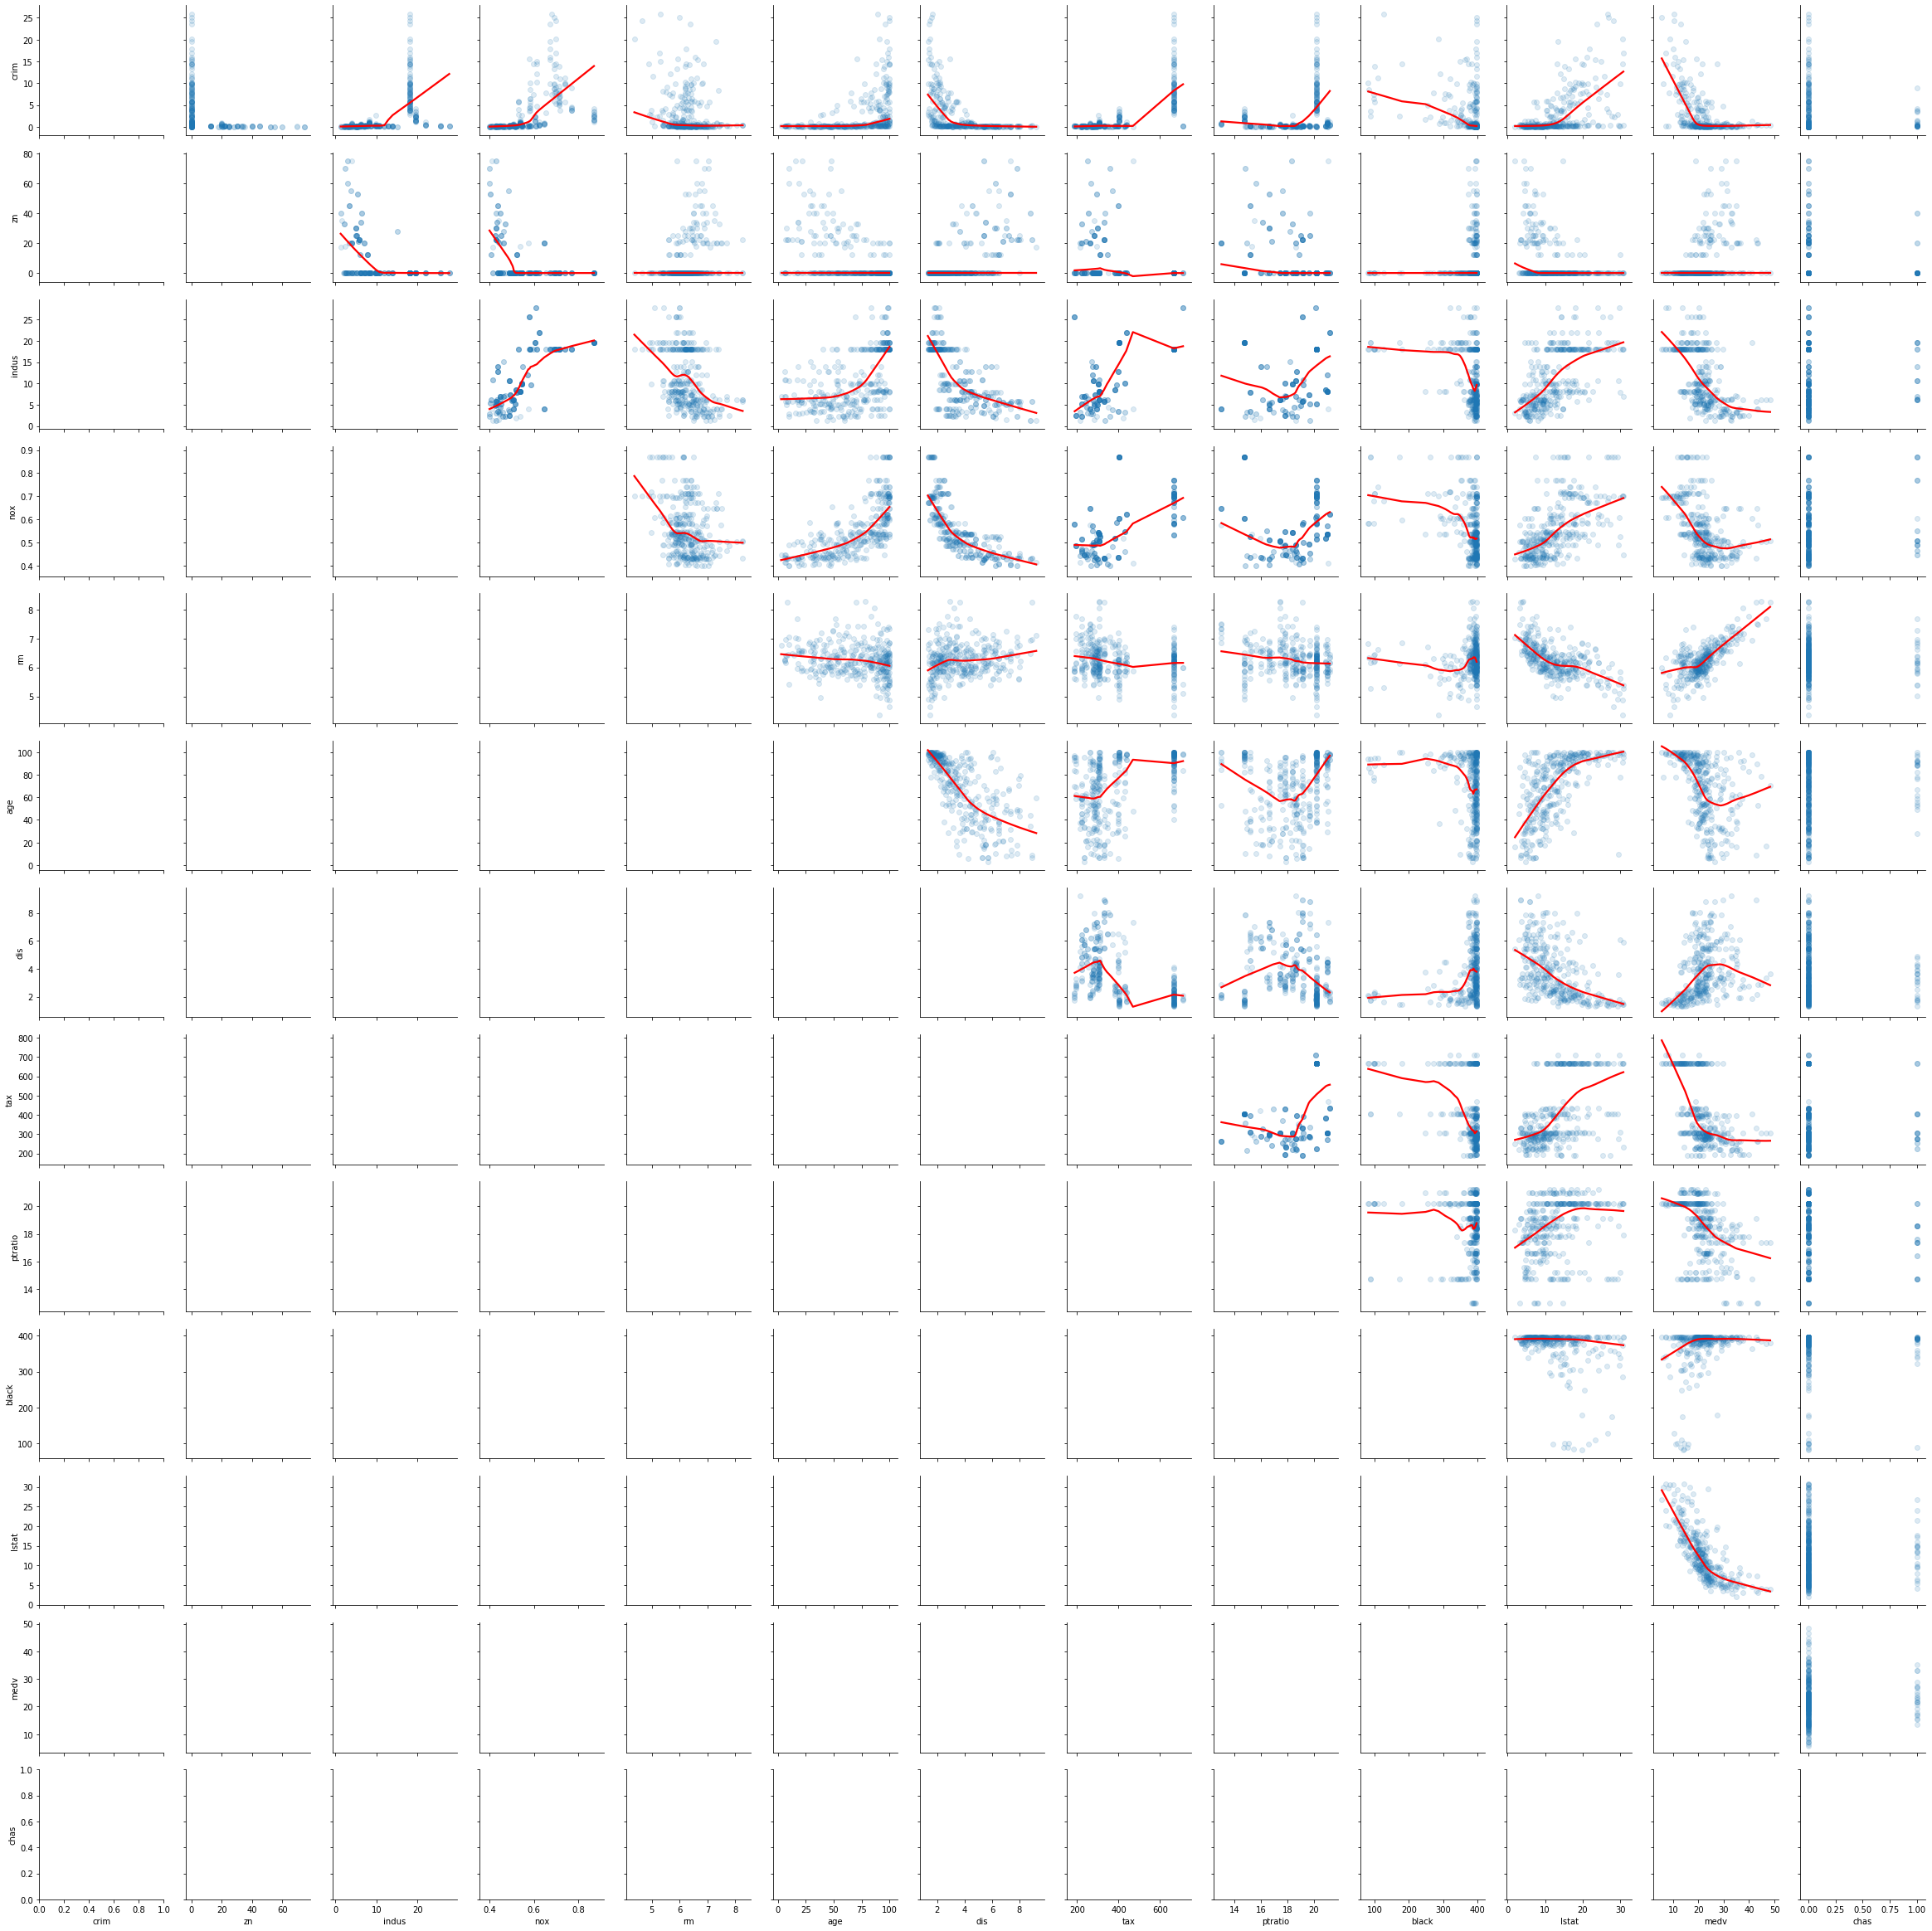

In [87]:
f = sns.PairGrid(df_clean)
f = f.map_upper(sns.regplot, lowess=True, scatter_kws={'alpha':0.15}, line_kws={'color': 'red'})

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

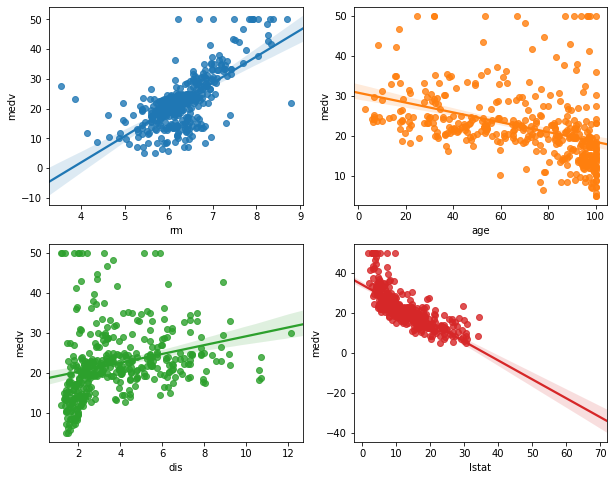

In [88]:
# Your plots here
f, axes = plt.subplots(2, 2)
f.set_size_inches(10,8)
sns.regplot(x="rm", y="medv", data=df, ax=axes[0, 0])
sns.regplot(x="age", y="medv", data=df, ax=axes[0, 1])
sns.regplot(x="dis", y="medv", data=df, ax=axes[1, 0])
sns.regplot(x="lstat", y="medv", data=df, ax=axes[1, 1])

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

##### Your response here

    - The more rooms a flat has, the more MEDV it has.
    - When distance to the emplyment center is greater, so it seems the median value of a flat.
    - The lower the % of low status, the higher the median value of a flat.

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

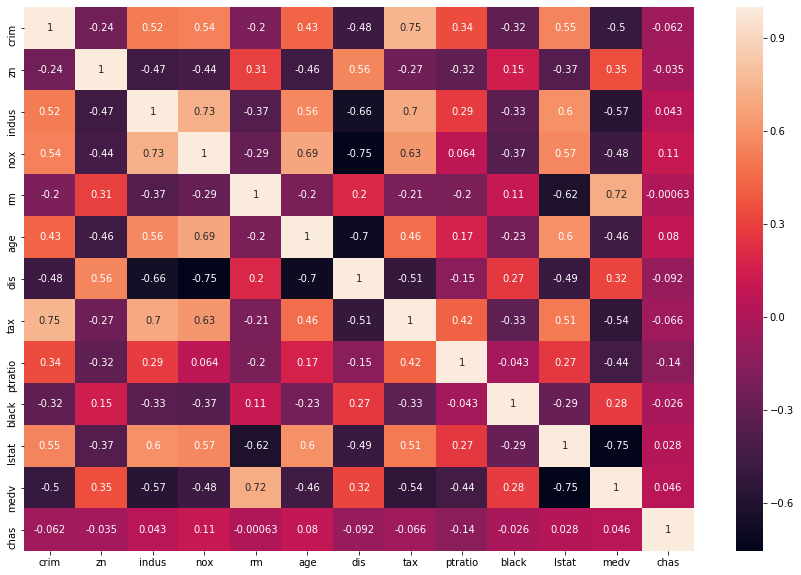

In [89]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_clean.corr(), annot=True, ax=ax)

In [90]:
X = add_constant(df_clean)
mc_check = pd.Series([outliers_influence.variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
             index=X.columns)
print(mc_check)

const      709.526852
crim         2.766775
zn           1.787083
indus        3.358514
nox          4.110645
rm           2.925783
age          2.927276
dis          3.590256
tax          3.946747
ptratio      1.786777
black        1.236501
lstat        3.556383
medv         4.609621
chas         1.056321
dtype: float64


##### Your response here

    -

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [91]:
# Your code here

df_clean.medv.describe()

count    344.000000
mean      21.870349
std        7.049946
min        5.600000
25%       17.800000
50%       21.400000
75%       24.700000
max       48.300000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [92]:
from sklearn.metrics import r2_score

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [93]:
df_clean.head()

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,black,lstat,medv,chas
0,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,305.0,19.2,376.94,9.88,21.7,0.0
1,0.10328,25.0,5.13,0.453,5.927,47.2,6.9320,284.0,19.7,396.90,9.22,19.6,0.0
2,0.34940,0.0,9.90,0.544,5.972,76.7,3.1025,304.0,18.4,396.24,9.97,20.3,0.0
3,2.73397,0.0,19.58,0.871,5.597,94.9,1.5257,403.0,14.7,351.85,21.45,15.4,0.0
4,0.04337,21.0,5.64,0.439,6.115,63.0,6.8147,243.0,16.8,393.97,9.43,20.5,0.0


In [94]:
# Your code here
y= df_clean['medv']
X= df_clean.drop(['medv'], axis=1)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [99]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

rf_model_2 = RandomForestRegressor(max_depth=2)
rf_model_4 = RandomForestRegressor(max_depth=4)
rf_model_6 = RandomForestRegressor(max_depth=6)
rf_model_8 = RandomForestRegressor(max_depth=8)
rf_model_10 = RandomForestRegressor(max_depth=10)

lst = [rf_model_2,rf_model_4,rf_model_6,rf_model_8,rf_model_10]

In [100]:
for i in lst:
    i.fit(X_train,y_train)

/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/abreualberto91/anaconda3/envs/ironhack/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 i

In [107]:
pred_test_lst = []

for i in lst:
    pred_test_lst.append(i.predict(X_test))

In [108]:
for i in pred_test_lst:
    print(r2_score(y_test,i))

0.6853793235629215
0.7571844456926875
0.7785381879824131
0.8231634930436139
0.7671661371717873


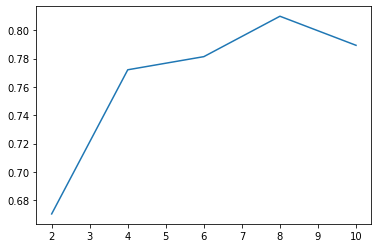

In [109]:
plot_data = [0.6703512471668895, 0.7720548414417716, 0.7813277118570638, 0.809831609892308, 0.7893225411629665]
lst = [2,4,6,8,10]
plt.plot(lst, plot_data)

Now, plot the score for each tree on the training set and on the testing set.

In [ ]:
# Produce a plot with the score for the testing and training for the different max depths


What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Your response here

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here